## HURICANE CLASSIFIER

### LOAD DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('selected_hurricane_data.csv')
df.head()

,Serial_Num (N/A),Season (Year),Name (N/A),ISO_time,day,month,hour,Nature (N/A),Latitude (deg_north),Longitude (deg_east),Wind(WMO) (kt),Pres(WMO) (mb),Wind(WMO) Percentile (%),Pres(WMO) Percentile (%),Intensity
0,1980199N31284,1980,UNNAMED,1980-07-17 00:00:00,17,7,0,TS,30.5,-76.5,20,0,0.857,-100.0,Unknown
1,1980199N31284,1980,UNNAMED,1980-07-17 06:00:00,17,7,6,TS,30.2,-77.2,25,0,4.702,-100.0,Unknown
2,1980199N31284,1980,UNNAMED,1980-07-17 12:00:00,17,7,12,TS,30.0,-78.0,25,0,4.702,-100.0,Unknown
3,1980199N31284,1980,UNNAMED,1980-07-17 18:00:00,17,7,18,TS,29.9,-79.3,25,0,4.702,-100.0,Unknown
4,1980199N31284,1980,UNNAMED,1980-07-18 00:00:00,18,7,0,TS,29.8,-80.2,25,0,4.702,-100.0,Unknown


In [3]:
selected_columns = [
    'Season (Year)', 
    'Latitude (deg_north)', 
    'Longitude (deg_east)', 
    'Wind(WMO) (kt)', 
    'Pres(WMO) (mb)', 
    'Wind(WMO) Percentile (%)', 
    'Pres(WMO) Percentile (%)', 
    'Nature (N/A)' # Target variable
]

# Creating a new dataframe with selected columns
selected_data = df[selected_columns]


basic_statistics = selected_data.describe()

basic_statistics

,Season (Year),Latitude (deg_north),Longitude (deg_east),Wind(WMO) (kt),Pres(WMO) (mb),Wind(WMO) Percentile (%),Pres(WMO) Percentile (%)
count,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000
mean,1997.144018,26.588408,-62.120095,48.810245,921.161873,44.547622,39.462629
std,9.126448,10.460518,21.010552,25.495429,258.229814,30.555272,48.380011
min,1980.000000,7.200000,-118.300000,0.000000,0.000000,-100.000000,-100.000000
25%,1989.000000,17.900000,-79.000000,30.000000,980.000000,17.062000,16.249000
50%,1998.000000,25.900000,-62.600000,40.000000,998.000000,42.219000,47.972000
75%,2005.000000,33.200000,-46.800000,60.000000,1006.000000,68.918000,74.198000
max,2011.000000,70.700000,13.500000,165.000000,1024.000000,99.997000,99.996000


##### Hurricane Classification Model - Target Variable 'Nature (N/A)'

The target variable 'Nature (N/A)' for the hurricane classification model includes the following categories along with their occurrences:

- **TS (Tropical Storm):** 10,668 occurrences.
- **ET (Extratropical):** 1,409 occurrences.
- **DS (Disturbance):** 811 occurrences.
- **SS (Subtropical Storm):** 405 occurrences.
- **NR (Not Reported or Unclassified):** 372 occurrences.

### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Selecting relevant features for the model
features = ['Latitude (deg_north)', 'Longitude (deg_east)', 'Wind(WMO) (kt)', 
            'Pres(WMO) (mb)','Season (Year)','month']
target = 'Nature (N/A)'

# Preparing the features and target variables
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10932, 6), (2733, 6), (10932,), (2733,))

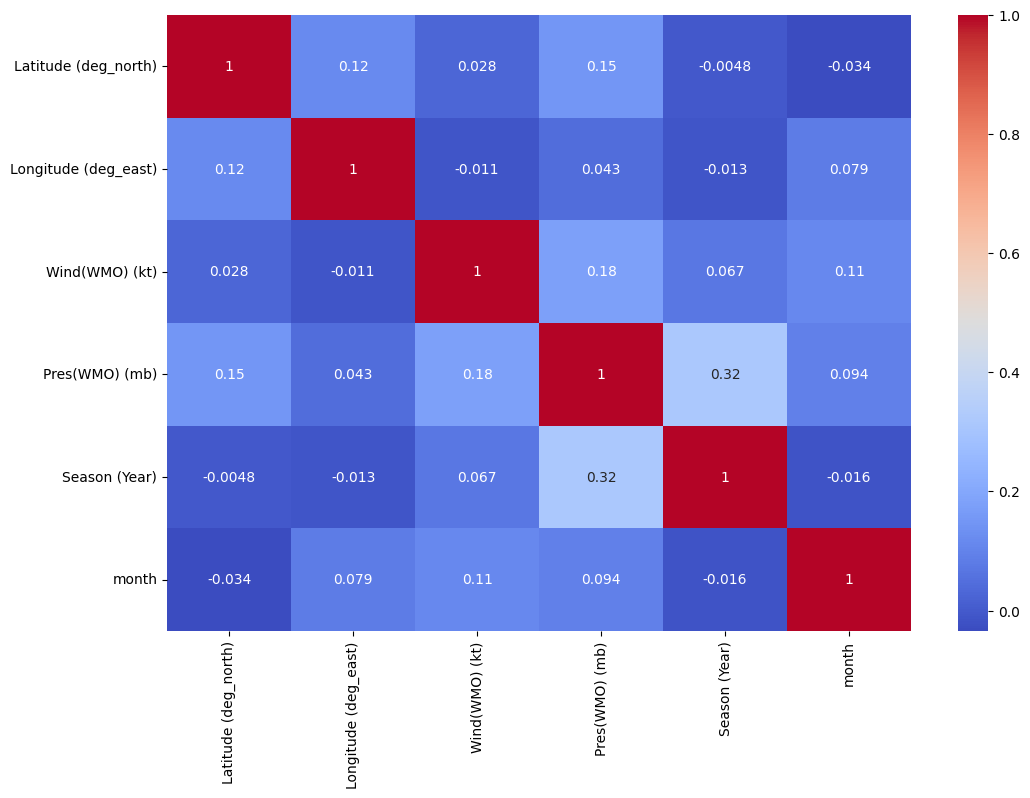

In [6]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Model Selection, Training, Prediction and Assessment

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [8]:
import random

In [9]:
np.random.seed(42)
random.seed(42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [12]:
def plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, classifier, y_pred, classifier_name):
    titles_options = [
        (f"{classifier_name} - Confusion matrix, without normalization", None),
        (f"{classifier_name} - Normalized confusion matrix", "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            classifier,
            X_test_scaled,
            y_test,
            display_labels=classifier.classes_,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

    plt.show()
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train_scaled, y_train)}')
    return print("")

In [13]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### K Nearest Neighbor

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set.
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn_prob = knn.predict_proba(X_test_scaled)
knn_report = classification_report(y_test, y_pred_knn)
cfm = confusion_matrix(y_test, y_pred_knn)

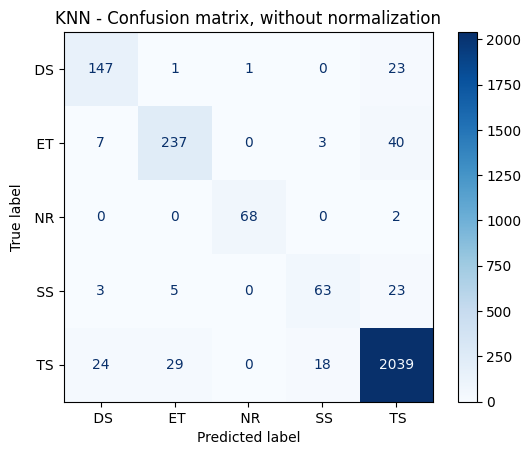

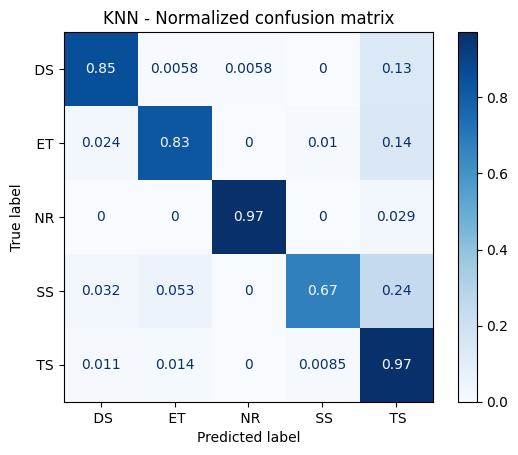

Accuracy Score Test: 0.9345042078302231
Accuracy Score Train: 0.9663373582144164



In [15]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, knn, y_pred_knn, 'KNN')

In [16]:
print(knn_report)

              precision    recall  f1-score   support

          DS       0.81      0.85      0.83       172
          ET       0.87      0.83      0.85       287
          NR       0.99      0.97      0.98        70
          SS       0.75      0.67      0.71        94
          TS       0.96      0.97      0.96      2110

    accuracy                           0.93      2733
   macro avg       0.88      0.86      0.87      2733
weighted avg       0.93      0.93      0.93      2733



#### Logistic Regression

In [17]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_logreg_prob = logreg.predict_proba(X_test_scaled)
log_report = classification_report(y_test, y_pred_logreg)
cfm = confusion_matrix(y_test, y_pred_logreg)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

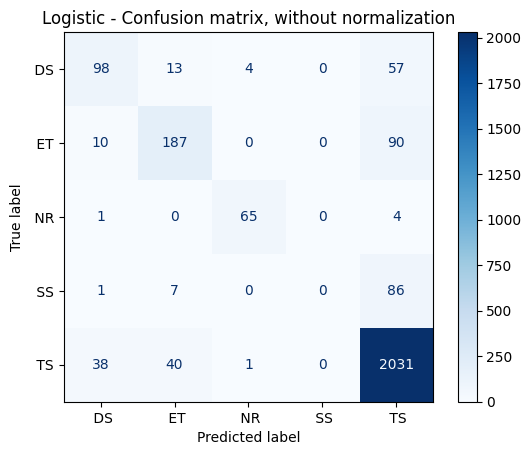

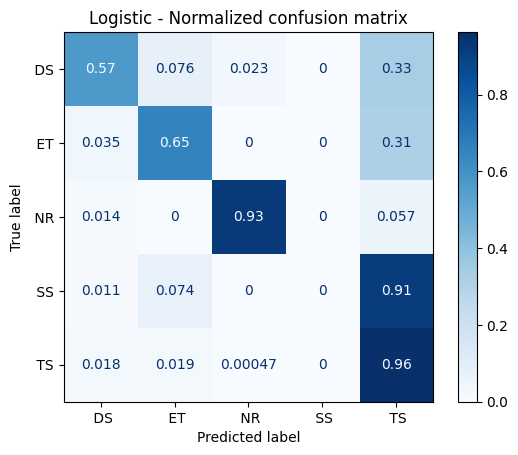

Accuracy Score Test: 0.871203805342115
Accuracy Score Train: 0.8794365166483717



In [18]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, logreg, y_pred_logreg, 'Logistic')

In [20]:
print(log_report)

              precision    recall  f1-score   support

          DS       0.66      0.57      0.61       172
          ET       0.76      0.65      0.70       287
          NR       0.93      0.93      0.93        70
          SS       0.00      0.00      0.00        94
          TS       0.90      0.96      0.93      2110

    accuracy                           0.87      2733
   macro avg       0.65      0.62      0.63      2733
weighted avg       0.84      0.87      0.85      2733



#### Random Forest

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf_prob = logreg.predict_proba(X_test_scaled)
rf_report = classification_report(y_test, y_pred_rf)
cfm_rf = confusion_matrix(y_test, y_pred_rf)

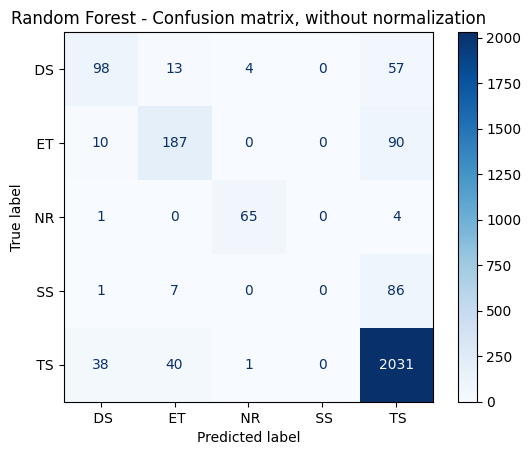

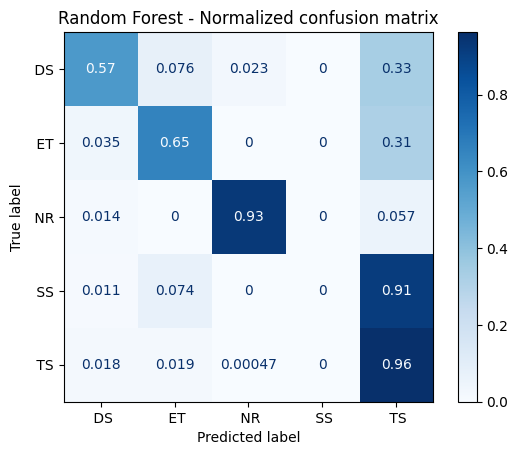

Accuracy Score Test: 0.9476765459202342
Accuracy Score Train: 0.8794365166483717



In [22]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, logreg, y_pred_rf, 'Random Forest')

In [24]:
print(rf_report)

              precision    recall  f1-score   support

          DS       0.93      0.87      0.90       172
          ET       0.91      0.84      0.87       287
          NR       1.00      0.97      0.99        70
          SS       0.92      0.59      0.71        94
          TS       0.95      0.98      0.97      2110

    accuracy                           0.95      2733
   macro avg       0.94      0.85      0.89      2733
weighted avg       0.95      0.95      0.95      2733



#### Decision Tree

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_scaled)
y_pred_dt_prop = dt.predict_proba(X_test_scaled)
dt_report = classification_report(y_test, y_pred_dt)
cfm_dt = confusion_matrix(y_test, y_pred_dt)


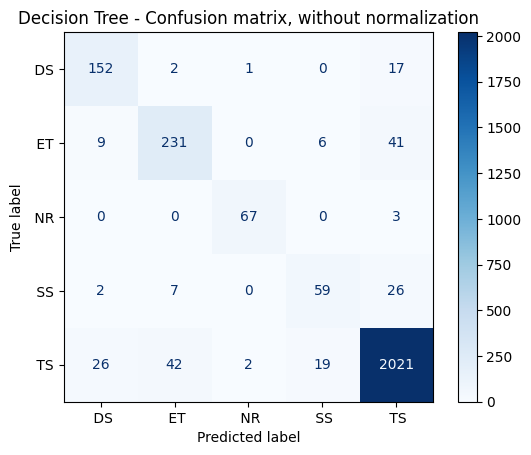

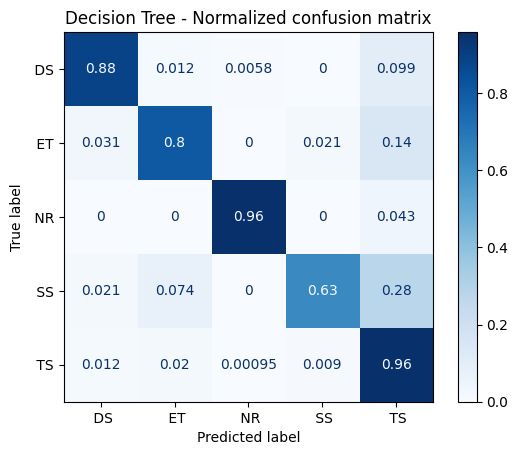

Accuracy Score Test: 0.9257226491035492
Accuracy Score Train: 1.0



In [26]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, dt, y_pred_dt, 'Decision Tree')

In [28]:
print(dt_report)

              precision    recall  f1-score   support

          DS       0.80      0.88      0.84       172
          ET       0.82      0.80      0.81       287
          NR       0.96      0.96      0.96        70
          SS       0.70      0.63      0.66        94
          TS       0.96      0.96      0.96      2110

    accuracy                           0.93      2733
   macro avg       0.85      0.85      0.85      2733
weighted avg       0.93      0.93      0.93      2733



#### Support Vector Machine

In [29]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)
y_pred_svm_prob = svm.predict_proba(X_test_scaled)

# Generate the classification report and confusion matrix
svm_report = classification_report(y_test, y_pred_svm)
cfm_svm = confusion_matrix(y_test, y_pred_svm)

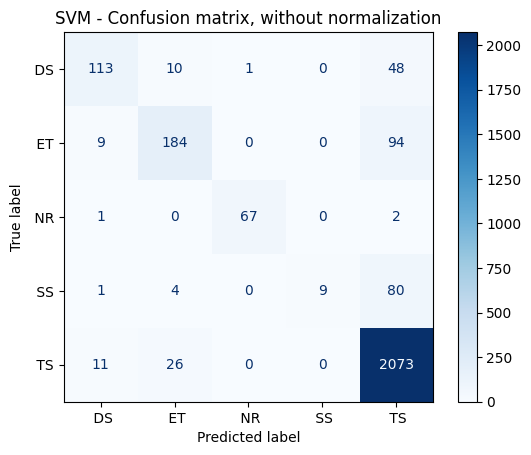

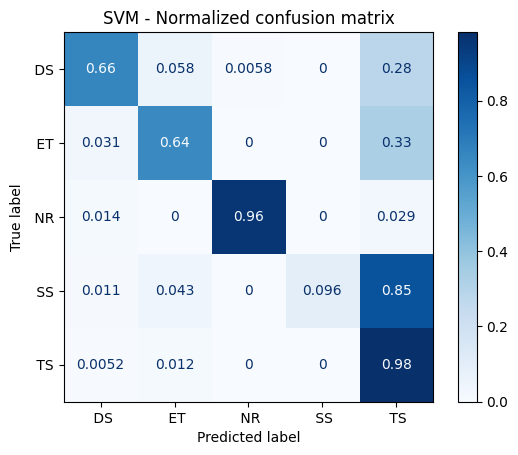

Accuracy Score Test: 0.8949871935601903
Accuracy Score Train: 0.8995609220636663



In [30]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, svm, y_pred_svm, 'SVM')

In [31]:
print(svm_report)

              precision    recall  f1-score   support

          DS       0.84      0.66      0.74       172
          ET       0.82      0.64      0.72       287
          NR       0.99      0.96      0.97        70
          SS       1.00      0.10      0.17        94
          TS       0.90      0.98      0.94      2110

    accuracy                           0.89      2733
   macro avg       0.91      0.67      0.71      2733
weighted avg       0.90      0.89      0.88      2733



### Hyperparameter/ Model Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

#### KNN Tuning

In [33]:
#Define parameter grid for GridSearch and instanciate and train model.
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test_scaled)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test_scaled)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 1} 



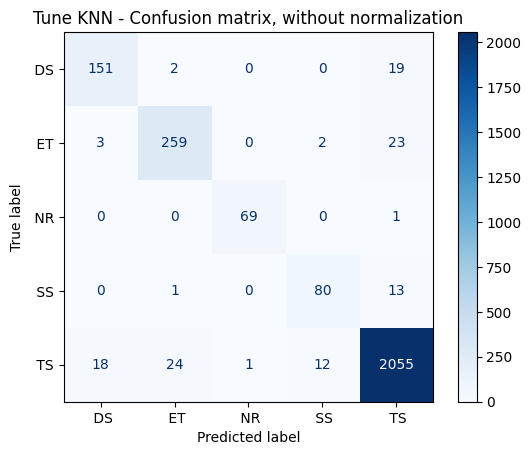

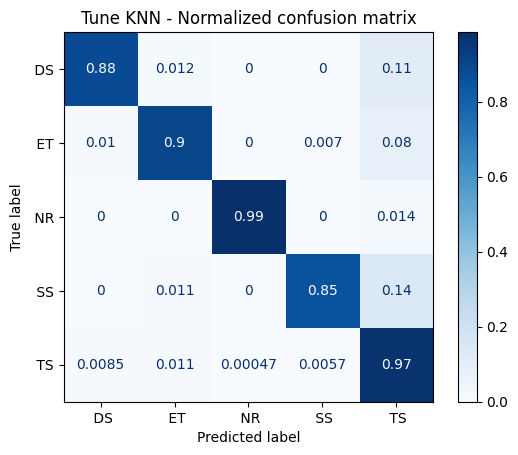

Accuracy Score Test: 0.9564581046469082
Accuracy Score Train: 1.0



In [34]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, knn_cv, y_pred_knn_tuned, 'Tune KNN')

In [35]:
knn_cv_report = classification_report(y_test, y_pred_knn_tuned)
print(knn_cv_report)

              precision    recall  f1-score   support

          DS       0.88      0.88      0.88       172
          ET       0.91      0.90      0.90       287
          NR       0.99      0.99      0.99        70
          SS       0.85      0.85      0.85        94
          TS       0.97      0.97      0.97      2110

    accuracy                           0.96      2733
   macro avg       0.92      0.92      0.92      2733
weighted avg       0.96      0.96      0.96      2733



In [36]:
import plotly.express as px


In [37]:
# Inverse transform the scaled test data
X_test_original = scaler.inverse_transform(X_test_scaled)
X_test_original

array([[  31.7,  -77.3,  100. ,  964. , 1998. ,    8. ],
       [  23. ,  -96.7,   45. ,  995. , 1995. ,    8. ],
       [  13.8,  -29.8,   30. , 1005. , 1999. ,    9. ],
       ...,
       [  25. ,  -66.6,   45. , 1003. , 2010. ,    9. ],
       [  13.8,  -44.7,   30. , 1008. , 2005. ,    8. ],
       [  12.8,  -29. ,   90. ,  965. , 1980. ,    9. ]])

In [38]:
# Assuming the order of features in X_test_scaled is [latitude, longitude, wind speed]
latitude = X_test_original[:, 0]  # Replace 0 with the correct index for latitude
longitude = X_test_original[:, 1]  # Replace 1 with the correct index for longitude
wind_speed = X_test_original[:, 2]  # Replace 2 with the correct index for wind speed


In [39]:
new_check = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude, 'Wind': wind_speed, 'Result': y_pred_knn_tuned})
fig = px.scatter_3d(new_check, x='Latitude', y='Longitude', z='Wind', color='Result')
fig.update_layout(width=800, height=600) 

# Show the plot
fig.show()

#### Logistic Tunning

In [40]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l2'],       # L1 and L2 regularization
    'solver': ['lbfgs', 'liblinear']  # Solvers
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Set up the GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred_logreg_cv = grid_search.predict(X_test_scaled)
y_pred_logreg_prob_cv = grid_search.predict_proba(X_test_scaled)
log_report = classification_report(y_test, y_pred_logreg_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8793454292624092


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



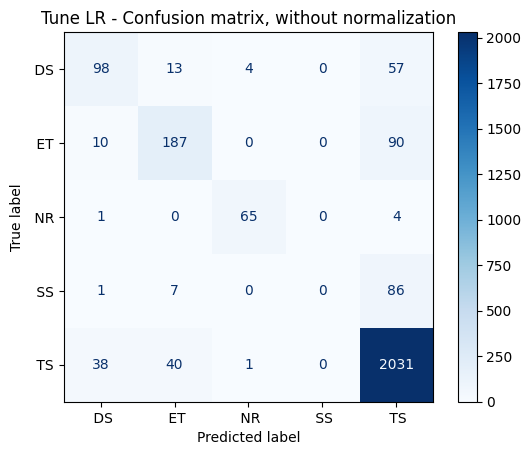

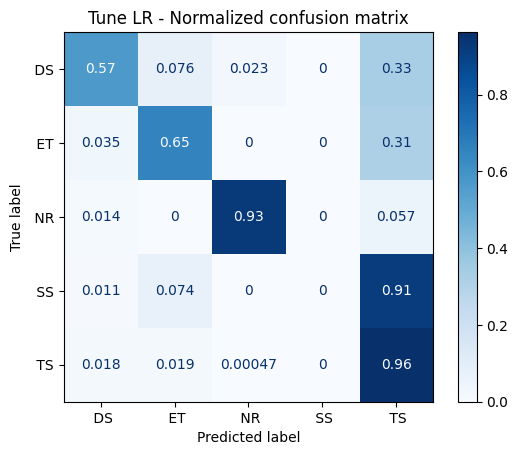

Accuracy Score Test: 0.871203805342115
Accuracy Score Train: 0.8797109403585803



In [41]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, grid_search, y_pred_logreg_cv, 'Tune LR')

In [42]:
print(log_report)

              precision    recall  f1-score   support

          DS       0.66      0.57      0.61       172
          ET       0.76      0.65      0.70       287
          NR       0.93      0.93      0.93        70
          SS       0.00      0.00      0.00        94
          TS       0.90      0.96      0.93      2110

    accuracy                           0.87      2733
   macro avg       0.65      0.62      0.63      2733
weighted avg       0.84      0.87      0.85      2733



#### Decision Tree Tuning

In [43]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Set up GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_dt.fit(X_train_scaled, y_train)  # Use non-scaled data for Decision Tree

y_pred_dt_cv = grid_search_dt.predict(X_test_scaled)
y_pred_dt_prob_cv = grid_search_dt.predict_proba(X_test_scaled)
dt_cv_report = classification_report(y_test, y_pred_dt_cv)
# Best parameters and best score for Decision Tree
print("Best Decision Tree parameters:", grid_search_dt.best_params_)
print("Best Decision Tree score:", grid_search_dt.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Decision Tree parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree score: 0.922429677822582


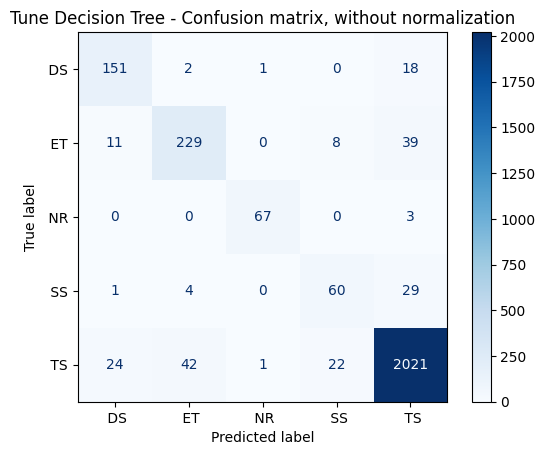

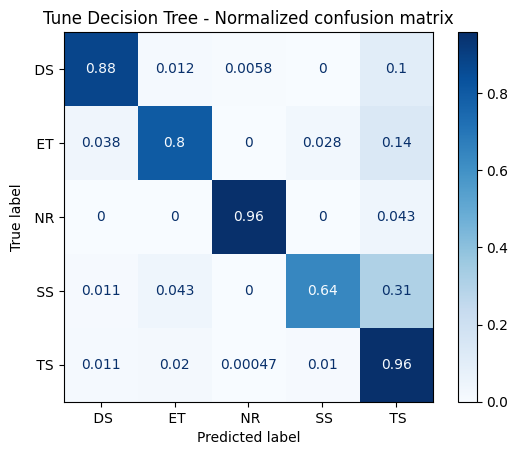

Accuracy Score Test: 0.9249908525429931
Accuracy Score Train: 1.0



In [44]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, grid_search_dt, y_pred_dt_cv, 'Tune Decision Tree')

In [45]:
dt_cv_report = classification_report(y_test, y_pred_dt_cv)
print(dt_cv_report)

              precision    recall  f1-score   support

          DS       0.81      0.88      0.84       172
          ET       0.83      0.80      0.81       287
          NR       0.97      0.96      0.96        70
          SS       0.67      0.64      0.65        94
          TS       0.96      0.96      0.96      2110

    accuracy                           0.92      2733
   macro avg       0.85      0.85      0.85      2733
weighted avg       0.92      0.92      0.92      2733



In [46]:
new_check = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude, 'Wind': wind_speed, 'Result': y_pred_dt_cv})
fig = px.scatter_3d(new_check, x='Latitude', y='Longitude', z='Wind', color='Result')
fig.update_layout(width=800, height=600) 

# Show the plot
fig.show()

#### Random Forest Tuning

In [51]:
param_grid_rf = {
    'n_estimators': [100],
    'max_features': ['sqrt'],
    'max_depth': np.arange(10, 200, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)  # Use non-scaled data for Random Forest

# Best parameters and best score for Random Forest
print("Best Random Forest parameters:", grid_search_rf.best_params_)
print("Best Random Forest score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 171 candidates, totalling 855 fits
Best Random Forest parameters: {'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest score: 0.9485000989377887


#### SVM Tuning

In [59]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM model
svm = SVC()

# Set up GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_svm.fit(X_train_scaled, y_train)  # Use scaled data for SVM

# Best parameters and best score for SVM
print("Best SVM parameters:", grid_search_svm.best_params_)
print("Best SVM score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best SVM parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best SVM score: 0.9404505371715338


In [60]:
y_pred_svm_cv = grid_search_svm.predict(X_test_scaled)
dt_svm_report = classification_report(y_test, y_pred_svm_cv)

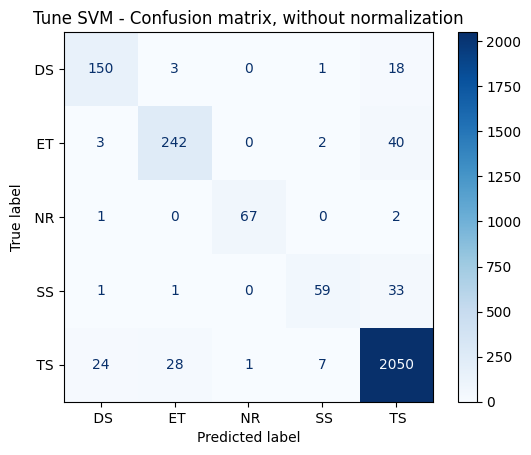

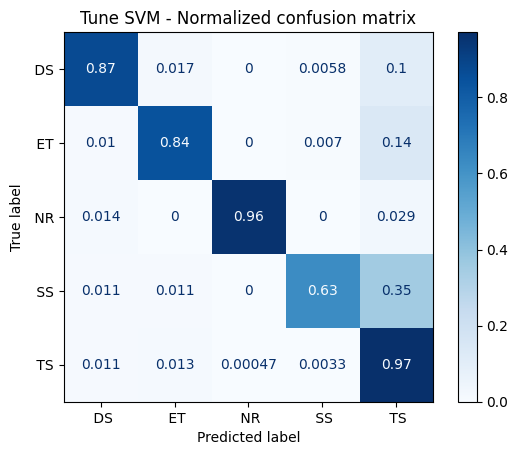

Accuracy Score Test: 0.9396267837541163
Accuracy Score Train: 0.9684412733260154



In [61]:
plot_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test, grid_search_svm, y_pred_svm_cv, 'Tune SVM')

In [62]:
print(dt_svm_report)

              precision    recall  f1-score   support

          DS       0.84      0.87      0.85       172
          ET       0.88      0.84      0.86       287
          NR       0.99      0.96      0.97        70
          SS       0.86      0.63      0.72        94
          TS       0.96      0.97      0.96      2110

    accuracy                           0.94      2733
   macro avg       0.90      0.85      0.88      2733
weighted avg       0.94      0.94      0.94      2733



#### Extra

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

In [68]:

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to categorical
num_classes = len(label_encoder.classes_)
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes)

# Instantiate NN
nn = Sequential()
input_shape = X_train_scaled.shape[1]

# Build up layer structure
nn.add(Dense(1024, input_shape=(input_shape,), activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(Dense(1024, activation='relu'))
nn.add(Dropout(0.2)) 

# Output layer for multi-class (use 'softmax' and number of classes)
nn.add(Dense(num_classes, activation='softmax'))

# Compile model (use 'categorical_crossentropy' for multi-class)
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
nn.summary()

# Set callback to store model with best validation accuracy
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# Train model and store best performing version
fit_nn = nn.fit(X_train_scaled, y_train_categorical,
                epochs=100,
                verbose=False,
                validation_data=(X_test_scaled, y_test_categorical),
                batch_size=30, callbacks=[mc])

# Load the best model
best_nn = load_model('best_model.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              7168      
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 1061893 (4.05 MB)
Trainable params: 1061893 (4.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [71]:
# Plot model evaluation of best and final model.
accuracy = best_nn.evaluate(X_train_scaled,  y_train_categorical, verbose=False)
print("Best Model Training Score: {:.4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = best_nn.evaluate(X_test_scaled, y_test_categorical, verbose=False)
print("Best Model Testing Score: {:.4f}".format(accuracy[0]))
print("Best Model Testing Accuracy: {:.4f}".format(accuracy[1]))
print("-----------------------------------------")

accuracy = nn.evaluate(X_train_scaled,  y_train_categorical, verbose=False)
print("Final Model Training Score: {:.4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = nn.evaluate(X_test_scaled,y_test_categorical, verbose=False)
print("Final Model Testing Score: {:.4f}".format(accuracy[0]))
print("Final Model Testing Accuracy: {:.4f}".format(accuracy[1]))

Best Model Training Score: 0.0617
Best Model Training Accuracy: 0.9757
Best Model Testing Score: 0.1681
Best Model Testing Accuracy: 0.9466
-----------------------------------------
Final Model Training Score: 0.0580
Final Model Training Accuracy: 0.9781
Final Model Testing Score: 0.1635
Final Model Testing Accuracy: 0.9462


In [72]:
def plot_history(fit_keras):
    acc = fit_keras.history['accuracy']
    val_acc = fit_keras.history['val_accuracy']
    loss = fit_keras.history['loss']
    val_loss = fit_keras.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc.')
    plt.plot(x, val_acc, 'r', label='Testing Acc.')
    plt.title('Training & Testing Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Testing Loss')
    plt.title('Training & Testing Accuracy')
    plt.legend()

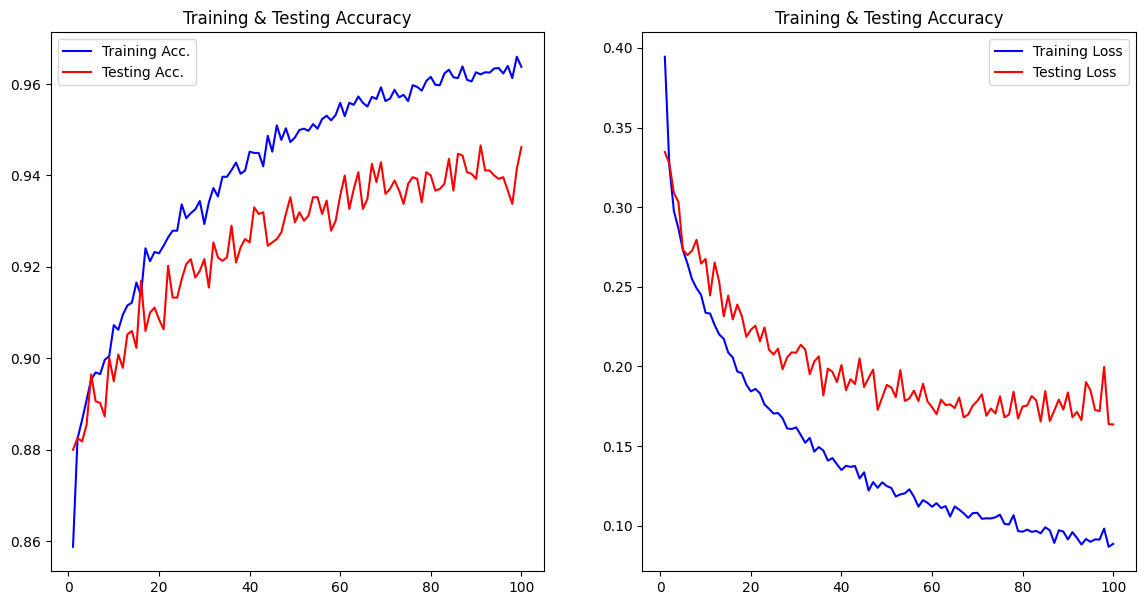

In [73]:
plot_history(fit_nn)

In [77]:
y_pred_nn = best_nn.predict(X_test_scaled)

# If your model outputs one-hot encoded predictions, take the argmax to get the class labels
y_pred_nn_classes = np.argmax(y_pred_nn, axis=-1)

# Now y_pred_nn_classes is a 1d array with the predicted class labels


86/86 [==============================] - 0s 4ms/step


In [84]:
y_true_encoded = label_encoder.transform(y_test)  # Convert string labels to integers

# Predicted labels (already integers from the previous step)
y_pred = np.argmax(best_nn.predict(X_test_scaled), axis=-1)

# Compute the confusion matrix using encoded labels
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Compute the accuracy score using encoded labels
acc_score = accuracy_score(y_true_encoded, y_pred)
report = classification_report(y_true_encoded, y_pred)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", acc_score)
print(report)

86/86 [==============================] - 0s 4ms/step
Confusion Matrix:
[[ 154    5    0    0   13]
 [   1  257    0    2   27]
 [   0    0   69    0    1]
 [   0    2    0   68   24]
 [  22   36    4    9 2039]]

Accuracy Score: 0.9465788510793999
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       172
           1       0.86      0.90      0.88       287
           2       0.95      0.99      0.97        70
           3       0.86      0.72      0.79        94
           4       0.97      0.97      0.97      2110

    accuracy                           0.95      2733
   macro avg       0.90      0.89      0.90      2733
weighted avg       0.95      0.95      0.95      2733



### Summary

In [103]:
models = [
    "knn", "logreg", "dt", "rf", "svm", "knn_tuned", "logreg_cv", "dt_cv", "svm_cv"
]

accuracies = []
f1_scores = []

for model_name in models:
    y_pred = eval(f"y_pred_{model_name}")  # Dynamically get the prediction array
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

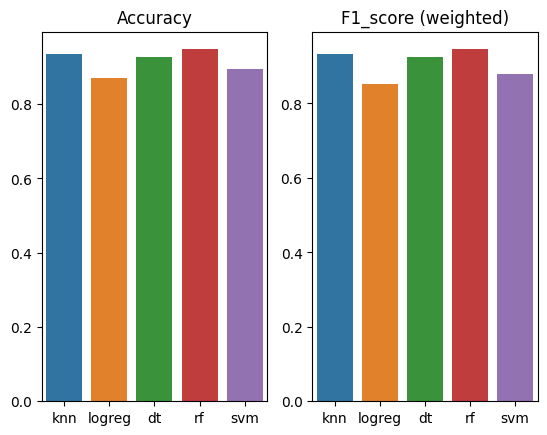

['knn', 'logreg', 'dt', 'rf', 'svm']
Accuracy: [0.9345042078302231, 0.871203805342115, 0.9257226491035492, 0.9476765459202342, 0.8949871935601903]
F1 Score (weighted): [0.9339404337628706, 0.8521989161126367, 0.9254097559624666, 0.9455715696101757, 0.8791582376177959]


In [116]:
fig, axs = plt.subplots(ncols=2) 
sns.barplot(x = models[:5], y = accuracies[:5],ax = fig.axes[0]).set(title='Accuracy')
sns.barplot(x = models[:5], y = f1_scores[:5], ax = fig.axes[1]).set(title='F1_score (weighted)')

plt.show()
print(models[:5])
print(f"Accuracy: { accuracies[:5] }")
print(f"F1 Score (weighted): {f1_scores[:5]}")

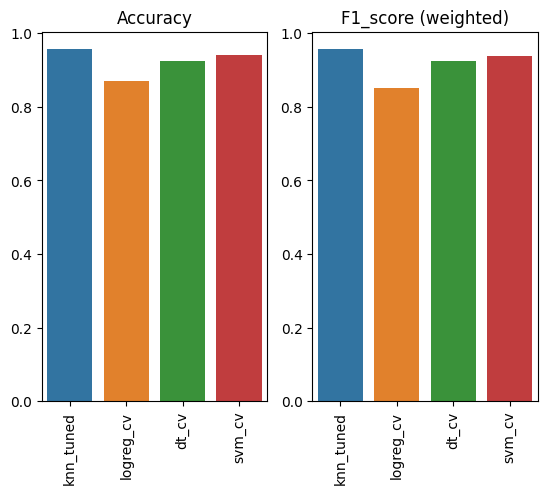

['knn_tuned', 'logreg_cv', 'dt_cv', 'svm_cv']
Accuracy: [0.9564581046469082, 0.871203805342115, 0.9249908525429931, 0.9396267837541163]
F1 Score (weighted): [0.9564453551129901, 0.8521989161126367, 0.9248216076479921, 0.9384303203054529]


In [121]:
fig, axs = plt.subplots(ncols=2) 
sns.barplot(x = models[5:], y = accuracies[5:],ax = fig.axes[0]).set(title='Accuracy')
sns.barplot(x = models[5:], y = f1_scores[5:], ax = fig.axes[1]).set(title='F1_score (weighted)')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
plt.show()
print(models[5:])
print(f"Accuracy: { accuracies[5:] }")
print(f"F1 Score (weighted): {f1_scores[5:]}")